# Лабораторная работа №1
## по дисциплине "Системы искусственного интеллекта"

Лабораторная работа посвящена работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib.
Для выполнения работы вам был предоставлен набор данных, содержащий информацию об атлетах, принявших участие в Летних Олимпийских играх 2024 в Париже.
Описание каждой колоноки в наборе данных приведено дальше.

code - код спортсмена;

name - полное имя спортсмена;

name_short - сокращенное имя;

name_tv - имя, отображаемое в эфире;

gender - пол спортсмена;

function - роль на олимпиаде;

country_code - код страны;

country - название страны;

country_full - полное название страны;

nationality - сокращенная национальность спортсмена;

nationality_full - полная национальность;

nationality_code - код национальности;

height - рост;

weight - вес;

disciplines - дисциплины, в которых принимает участие спортсмен;

events - состязания, в которых участвует спортсмен;

birth_date - дата рождения спортсмена.


Импортируйте необходимые библиотеки.

Загрузите набор данных из csv-файла. Выведите информацию обо всех колонках, количестве данных в наборе и их статистических показателях (среднее, медиана и т.д.).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
df = pd.read_csv('Datasets/athletes new.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11115 entries, 0 to 11114
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code              11115 non-null  int64  
 1   name              11115 non-null  object 
 2   name_short        11115 non-null  object 
 3   name_tv           11115 non-null  object 
 4   gender            11115 non-null  object 
 5   function          11115 non-null  object 
 6   country_code      11115 non-null  object 
 7   country           11115 non-null  object 
 8   country_full      11115 non-null  object 
 9   nationality       11115 non-null  object 
 10  nationality_full  11115 non-null  object 
 11  nationality_code  11115 non-null  object 
 12  height            11115 non-null  int64  
 13  weight            11099 non-null  float64
 14  disciplines       11115 non-null  object 
 15  events            11115 non-null  object 
 16  birth_date        11115 non-null  object

AttributeError: 'NoneType' object has no attribute 'describe'

In [8]:
df

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date
0,1535420,VALENCIA Alejandra,VALENCIA A,Alejandra VALENCIA,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team"", 'Mixed ...",1994-10-17
1,1535429,RUIZ Angela,RUIZ A,Angela RUIZ,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team""]",2006-07-28
2,1535430,GRANDE Matias,GRANDE M,Matias GRANDE,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team"", 'Mixed Team']",2004-04-26
3,1536460,ROJAS Carlos,ROJAS C,Carlos ROJAS,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",2000-01-14
4,1536467,MARTINEZ WING Bruno,MARTINEZ WING B,Bruno MARTINEZ WING,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",1998-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11110,1981775,SULEYMANOV Sanan,SULEYMANOV S,Sanan SULEYMANOV,Male,Athlete,AZE,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,AZE,0,0.0,['Wrestling'],"[""Men's Greco-Roman 77kg""]",1996-12-15
11111,1981785,MAGOMEDOV Magomedkhan,MAGOMEDOV M,Magomedkhan MAGOMEDOV,Male,Athlete,AZE,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,AZE,0,0.0,['Wrestling'],"[""Men's Freestyle 97kg""]",1998-01-27
11112,2008688,SACULTAN Maxim,SACULTAN M,Maxim SACULTAN,Male,Athlete,MDA,Republic of Moldova,Republic of Moldova,Republic of Moldova,Republic of Moldova,MDA,0,0.0,['Wrestling'],"[""Men's Freestyle 65kg""]",1996-11-18
11113,3429662,VALIEV Chermen,VALIEV C,Chermen VALIEV,Male,Athlete,ALB,Albania,Albania,Albania,Albania,ALB,0,0.0,['Wrestling'],"[""Men's Freestyle 74kg""]",1998-12-10


In [6]:
df.describe()

,code,height,weight
count,1.111500e+04,11115.000000,11099.000000
mean,1.887426e+06,81.835178,2.213713
std,3.587687e+05,89.504711,13.114771
min,1.532872e+06,0.000000,0.000000
25%,1.888186e+06,0.000000,0.000000
50%,1.918842e+06,0.000000,0.000000
75%,1.948950e+06,177.000000,0.000000
max,9.460001e+06,222.000000,113.000000


Проверьте наличие пропусков в данных и заполните их, выбрав стратегию работы с пропусками.

In [7]:
df.isna().sum()

code                 0
name                 0
name_short           0
name_tv              0
gender               0
function             0
country_code         0
country              0
country_full         0
nationality          0
nationality_full     0
nationality_code     0
height               0
weight              16
disciplines          0
events               0
birth_date           0
dtype: int64

In [15]:
mean_height: int = int(df[df['height'] != 0]['height'].mean())
mean_height

178

In [17]:
mean_weight: int = int(df[df['weight'] != 0]['weight'].mean())
mean_weight

77

In [16]:
df['height'] = df['height'].apply(lambda x: mean_height if x == 0 else x)
df['height']

0        178
1        178
2        178
3        178
4        178
        ... 
11110    178
11111    178
11112    178
11113    178
11114    178
Name: height, Length: 11115, dtype: int64

In [19]:
df['weight'] = df['weight'].apply(lambda x: mean_weight if x == 0 else x)
df['weight']

0        77.0
1        77.0
2        77.0
3        77.0
4        77.0
         ... 
11110    77.0
11111    77.0
11112    77.0
11113    77.0
11114    77.0
Name: weight, Length: 11115, dtype: float64

In [20]:
df['weight'].fillna(df['weight'].mean(), inplace=True)
df

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date
0,1535420,VALENCIA Alejandra,VALENCIA A,Alejandra VALENCIA,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,178,77.0,['Archery'],"[""Women's Individual"", ""Women's Team"", 'Mixed ...",1994-10-17
1,1535429,RUIZ Angela,RUIZ A,Angela RUIZ,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,178,77.0,['Archery'],"[""Women's Individual"", ""Women's Team""]",2006-07-28
2,1535430,GRANDE Matias,GRANDE M,Matias GRANDE,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,178,77.0,['Archery'],"[""Men's Individual"", ""Men's Team"", 'Mixed Team']",2004-04-26
3,1536460,ROJAS Carlos,ROJAS C,Carlos ROJAS,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,178,77.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",2000-01-14
4,1536467,MARTINEZ WING Bruno,MARTINEZ WING B,Bruno MARTINEZ WING,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,178,77.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",1998-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11110,1981775,SULEYMANOV Sanan,SULEYMANOV S,Sanan SULEYMANOV,Male,Athlete,AZE,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,AZE,178,77.0,['Wrestling'],"[""Men's Greco-Roman 77kg""]",1996-12-15
11111,1981785,MAGOMEDOV Magomedkhan,MAGOMEDOV M,Magomedkhan MAGOMEDOV,Male,Athlete,AZE,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,AZE,178,77.0,['Wrestling'],"[""Men's Freestyle 97kg""]",1998-01-27
11112,2008688,SACULTAN Maxim,SACULTAN M,Maxim SACULTAN,Male,Athlete,MDA,Republic of Moldova,Republic of Moldova,Republic of Moldova,Republic of Moldova,MDA,178,77.0,['Wrestling'],"[""Men's Freestyle 65kg""]",1996-11-18
11113,3429662,VALIEV Chermen,VALIEV C,Chermen VALIEV,Male,Athlete,ALB,Albania,Albania,Albania,Albania,ALB,178,77.0,['Wrestling'],"[""Men's Freestyle 74kg""]",1998-12-10


Удалите колонки code, name_short, name_tv

In [23]:
df = df.drop(['code', 'name_short', 'name_tv'], axis=1)
df

,name,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date
0,VALENCIA Alejandra,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,178,77.0,['Archery'],"[""Women's Individual"", ""Women's Team"", 'Mixed ...",1994-10-17
1,RUIZ Angela,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,178,77.0,['Archery'],"[""Women's Individual"", ""Women's Team""]",2006-07-28
2,GRANDE Matias,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,178,77.0,['Archery'],"[""Men's Individual"", ""Men's Team"", 'Mixed Team']",2004-04-26
3,ROJAS Carlos,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,178,77.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",2000-01-14
4,MARTINEZ WING Bruno,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,178,77.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",1998-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11110,SULEYMANOV Sanan,Male,Athlete,AZE,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,AZE,178,77.0,['Wrestling'],"[""Men's Greco-Roman 77kg""]",1996-12-15
11111,MAGOMEDOV Magomedkhan,Male,Athlete,AZE,Azerbaijan,Azerbaijan,Azerbaijan,Azerbaijan,AZE,178,77.0,['Wrestling'],"[""Men's Freestyle 97kg""]",1998-01-27
11112,SACULTAN Maxim,Male,Athlete,MDA,Republic of Moldova,Republic of Moldova,Republic of Moldova,Republic of Moldova,MDA,178,77.0,['Wrestling'],"[""Men's Freestyle 65kg""]",1996-11-18
11113,VALIEV Chermen,Male,Athlete,ALB,Albania,Albania,Albania,Albania,ALB,178,77.0,['Wrestling'],"[""Men's Freestyle 74kg""]",1998-12-10


Из какой страны было больше всего атлетов? Сколько их было?

In [68]:
df['country'].value_counts()[0]

620

Найдите 15 стран, из которых было больше всего спортсменов. Постройте гистограмму, где по горизонтальной оси будет отображаться код страны, а по вертикальной - количество спортсменов.

In [65]:
country_df = df.groupby(['country', 'country_code']).size().reset_index(name='count')

country_df_top = country_df[country_df['count'] >= 177]

country_df_top = df[df['country_code'].isin(country_df_top['country_code'])]
country_df_top['country_code'].value_counts()

country_code
USA    620
FRA    600
AUS    476
GER    457
JPN    432
ESP    401
CHN    398
ITA    397
GBR    341
CAN    332
BRA    290
NED    289
POL    226
NZL    208
BEL    177
HUN    177
Name: count, dtype: int64

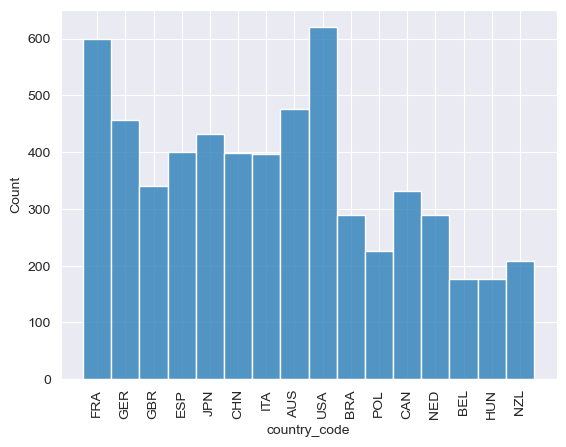

In [69]:
sns.histplot(data=country_df_top, x='country_code')
plt.xticks(rotation=90);

Сколько женщин и мужчин участвовало в Олимпиаде?

In [38]:
df['gender'].value_counts()

gender
Male      5655
Female    5460
Name: count, dtype: int64

Выведите количество женщин, которые участвовали только в одной соревновательной группе (колонка events).

In [72]:
df['events'].value_counts()

events
['Men']                                                                                                                                                                               1478
['Women']                                                                                                                                                                             1385
["Men's Individual"]                                                                                                                                                                   103
["Women's Individual"]                                                                                                                                                                 102
["Women's Marathon"]                                                                                                                                                                    95
                                                          

Выведите количество спортсменов, у которых национальность не совпадает со страной, за которую они выступают.

Какой процент мужчин моложе 23 участвовало в этой Олимпиаде?

Постройте график зависимости роста от веса у женщин (scatter plot).

Постройте график распределения, где по оси X будет показан возраст, а по оси Y - процент спортсменов этого возраста, принявших участие в Олимпиаде для женщин и мужчин на одном графике.

Постройте круговую диаграмму, чтобы отобразить долю спортсменов по пяти странам с наибольшим количеством участников.